In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes,svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report
import ast
from imblearn.over_sampling import SMOTE, ADASYN
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/T-I-P/Hope-Speech-Detection/master/English/train_tokenized.csv")
test = pd.read_csv("https://raw.githubusercontent.com/T-I-P/Hope-Speech-Detection/master/English/valid_tokenized.csv")

In [ ]:
train.head()

,Unnamed: 0,text,intent,text_final
0,0,"['these', 'tiktok', 'radiate', 'gay', 'chaotic...",Non_hope_speech,"['tiktok', 'radiate', 'gay', 'chaotic', 'energ..."
1,1,"['again', 'he', 'get', 'kill', 'for', 'use', '...",Non_hope_speech,"['get', 'kill', 'use', 'false', 'money']"
2,2,"['it', 'be', 'not', 'that', 'all', 'life', 'do...",Non_hope_speech,"['life', 'matter']"
3,3,"['be', 'it', 'really', 'that', 'difficult', 't...",Non_hope_speech,"['really', 'difficult', 'understand', 'black',..."
4,4,"['whenever', 'we', 'say', 'black', 'be', 'not'...",Non_hope_speech,"['whenever', 'say', 'black', 'racist', 'say', ..."


In [ ]:
train = train.drop('Unnamed: 0', axis=1)
test = test.drop('Unnamed: 0',axis =1)

In [ ]:
def string2list(data):
    for i, sentence in enumerate(data):
        res = ast.literal_eval(sentence)
        data[i] = res
    # return data

In [ ]:
string2list(train.text)
string2list(test.text)
string2list(train.text_final)
string2list(test.text_final)

In [ ]:
def listToString(s):
    str1 = " "
    return (str1.join(s))

for i,sen in enumerate(train['text']):
  train['text'][i] = listToString(sen)

In [ ]:
for i,sen in enumerate(test['text']):
  test['text'][i] = listToString(sen)

In [ ]:
train.head()

,text,intent,text_final
0,these tiktok radiate gay chaotic energy and lo...,Non_hope_speech,"[tiktok, radiate, gay, chaotic, energy, love]"
1,again he get kill for use false money,Non_hope_speech,"[get, kill, use, false, money]"
2,it be not that all life do not matter,Non_hope_speech,"[life, matter]"
3,be it really that difficult to understand blac...,Non_hope_speech,"[really, difficult, understand, black, live, m..."
4,whenever we say black be not that racist why d...,Non_hope_speech,"[whenever, say, black, racist, say, american]"


In [ ]:
Test_X = test['text']
Test_Y = test['intent']

In [ ]:
Train_X, Valid_X, Train_Y, Valid_Y = model_selection.train_test_split(train['text'],train['intent'],test_size=0.3)

In [ ]:
Train_Y = Train_Y.replace(to_replace ="Non_hope_speech", value =0)
Train_Y = Train_Y.replace(to_replace ="Hope_speech", value =1)
Train_Y.unique()

Test_Y = Test_Y.replace(to_replace ="Non_hope_speech", value =0)
Test_Y = Test_Y.replace(to_replace ="Hope_speech", value =1)
Train_Y.unique()

Valid_Y = Valid_Y.replace(to_replace ="Non_hope_speech", value =0)
Valid_Y = Valid_Y.replace(to_replace ="Hope_speech", value =1)
Valid_Y.unique()

array([0, 1])

In [ ]:
# Other method for doing operations done in above 1 cell
# can use either of them
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Valid_Y = Encoder.fit_transform(Valid_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
#Tokenization
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(train['text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
Valid_X_Tfidf = Tfidf_vect.transform(Valid_X)

## **SMOTE**

In [ ]:
smt_list = []
for i in range(25,101,25):
  print(i)
  a = SMOTE(sampling_strategy=i/100)
  smt_list.append(a)

25
50
75
100


In [ ]:
X_smote=[]
y_smote=[]
for i in range(0,4):
  a,b = smt_list[i].fit_sample(Train_X_Tfidf, Train_Y)
  X_smote.append(a)
  y_smote.append(b)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(Tfidf_vect.vocabulary_)

{'these': 4497, 'radiate': 3609, 'gay': 1705, 'energy': 1350, 'and': 189, 'love': 2584, 'it': 2280, 'again': 90, 'he': 1907, 'get': 1733, 'kill': 2390, 'for': 1601, 'use': 4727, 'false': 1487, 'money': 2840, 'be': 411, 'not': 3047, 'that': 4471, 'all': 135, 'life': 2513, 'do': 1211, 'matter': 2688, 'really': 3656, 'difficult': 1156, 'to': 4549, 'understand': 4678, 'black': 491, 'live': 2539, 'exclusive': 1433, 'they': 4498, 'both': 540, 'true': 4621, 'as': 289, 'general': 1715, 'statement': 4255, 'so': 4148, 'white': 4865, 'asian': 297, 'in': 2139, 'this': 4507, 'context': 871, 'simply': 4089, 'the': 4476, 'name': 2913, 'of': 3108, 'movement': 2872, 'against': 91, 'high': 1954, 'rate': 3638, 'police': 3405, 'violence': 4778, 'on': 3136, 'people': 3300, 'refer': 3678, 'those': 4512, 'who': 4868, 'behave': 435, 'like': 2520, 'treat': 4607, 'if': 2095, 'example': 1425, 'whenever': 4854, 'we': 4821, 'say': 3907, 'racist': 3606, 'why': 4878, 'just': 2363, 'americans': 171, 'boss': 538, 'don

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


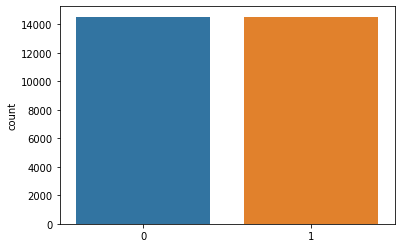

In [ ]:
sns.countplot(y_smote[3])

**Naive Bayes**

In [ ]:
for i in range(0,4):
  Naive = naive_bayes.MultinomialNB()
  Naive.fit(X_smote[i],y_smote[i])
  predictions_NB = Naive.predict(Valid_X_Tfidf)
  print("Naive Bayes Accuracy Score on valid set-> ",accuracy_score(predictions_NB, Valid_Y)*100)
  predictions_NB_T = Naive.predict(Test_X_Tfidf)
  print("Naive Bayes Accuracy Score on test set-> ",accuracy_score(predictions_NB_T, Test_Y)*100)
  predictions_NB_Tr = Naive.predict(X_smote[i])
  print("Naive Bayes Accuracy Score on training set -> ",accuracy_score(predictions_NB_Tr, y_smote[i])*100)
  print ('\n*Classification Report: Naive bayes\n', classification_report(Test_Y, predictions_NB_T))
  print(confusion_matrix(Test_Y, predictions_NB_T))


Naive Bayes Accuracy Score on valid set->  91.88673708920187
Naive Bayes Accuracy Score on test set->  91.19408242338851
Naive Bayes Accuracy Score on training set ->  85.77242479238849
Naive Bayes Accuracy Score on training set ->  93.31530625078607

*Classification Report: Naive bayes
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      2568
           1       0.61      0.22      0.32       271

    accuracy                           0.91      2839
   macro avg       0.77      0.60      0.64      2839
weighted avg       0.89      0.91      0.89      2839

[[2530   38]
 [ 212   59]]
Naive Bayes Accuracy Score on valid set->  89.21654929577466
Naive Bayes Accuracy Score on test set->  89.99647763296934
Naive Bayes Accuracy Score on training set ->  88.51054078826765
Naive Bayes Accuracy Score on training set ->  92.12048798893221

*Classification Report: Naive bayes
               precision    recall  f1-score   support

           0 

**SVM**

In [ ]:
for i in range(0,4):
  SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
  SVM.fit(X_smote[i],y_smote[i])
  predictions_SVM = SVM.predict(Valid_X_Tfidf)
  print("SVM Accuracy Score on valid set-> ",accuracy_score(predictions_SVM, Valid_Y)*100)
  #accuracy on test set
  predictions_SVM_T = SVM.predict(Test_X_Tfidf)
  print("SVM Accuracy Score test set -> ",accuracy_score(predictions_SVM_T, Test_Y)*100)
  # Training set accuracy SVM
  predictions_SVM_Tr = SVM.predict(X_smote[i])
  print("SVM Accuracy Score on training set -> ",accuracy_score(predictions_SVM_Tr, y_smote[i])*100)
  print('\n*Classification Report: SVM\n', classification_report(Test_Y, predictions_SVM_T))
  print(confusion_matrix(Test_Y, predictions_SVM_T))

SVM Accuracy Score on valid set->  91.34389671361502
SVM Accuracy Score test set ->  91.01796407185628
SVM Accuracy Score on training set ->  93.49392289501182

*Classification Report: SVM
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2568
           1       0.53      0.54      0.54       271

    accuracy                           0.91      2839
   macro avg       0.74      0.75      0.74      2839
weighted avg       0.91      0.91      0.91      2839

[[2437  131]
 [ 124  147]]
SVM Accuracy Score on valid set->  89.05516431924883
SVM Accuracy Score test set ->  88.90454385346953
SVM Accuracy Score on training set ->  93.35930339138405

*Classification Report: SVM
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      2568
           1       0.44      0.62      0.52       271

    accuracy                           0.89      2839
   macro avg       0.70      0.77      0.73     

**Logistic Regression**

In [ ]:
for i in range(0,4):
    LR = LogisticRegression()
    model = LR.fit(X_smote[i],y_smote[i])
    prediction_LR = model.predict(Valid_X_Tfidf)
    print("Logistic Regression Accuracy Score on valid set-> ",accuracy_score(prediction_LR, Valid_Y)*100)
    #accuracy on test set
    predictions_LR_T = model.predict(Test_X_Tfidf)
    print("Logistic Regression Accuracy Score test set -> ",accuracy_score(predictions_LR_T, Test_Y)*100)
    # Training set accuracy SVM
    predictions_LR_Tr = model.predict(X_smote[i])
    print("Logistic Regression Accuracy Score on training set -> ",accuracy_score(predictions_LR_Tr, y_smote[i])*100)
    print('\n*Classification Report: Logistic Regression\n', classification_report(Test_Y, predictions_LR_T))
    print(confusion_matrix(Test_Y, predictions_LR_T))

Logistic Regression Accuracy Score on valid set->  91.56396713615024
Logistic Regression Accuracy Score test set ->  91.54631912645299
Logistic Regression Accuracy Score on training set ->  91.21707089039212

*Classification Report: Logistic Regression
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2568
           1       0.57      0.45      0.51       271

    accuracy                           0.92      2839
   macro avg       0.76      0.71      0.73      2839
weighted avg       0.91      0.92      0.91      2839

[[2476   92]
 [ 148  123]]
Logistic Regression Accuracy Score on valid set->  89.99413145539906
Logistic Regression Accuracy Score test set ->  90.41916167664671
Logistic Regression Accuracy Score on training set ->  90.8890925756187

*Classification Report: Logistic Regression
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      2568
           1       0.50      0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**KNN**

In [ ]:
lst_acc = []
lst_f1 = []
lst_recall = []
lst_prec = []
for i in range(0, 4):
  print("****************************************************************")
  for j in range(1,10):

    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(X_smote[i],y_smote[i])
    y_pred = knn.predict(Test_X_Tfidf)
    acc = metrics.accuracy_score(Test_Y, y_pred)
    recall = metrics.recall_score(Test_Y, y_pred)
    precision = metrics.precision_score(Test_Y, y_pred)
    f1 = metrics.f1_score(Test_Y, y_pred)
    # cr = classification_report(Test_Y, y_pred)
    print("Accuracy: {:.4f}" .format(acc), "F1 Score: {:.4f}" .format(f1), "Precision: {:.4f}" .format(precision), "Recall: {:.4f}" .format(recall))
    #print(cr)
    #print("Confusion Matrix :" confusion_matrix(Test_Y, predictions_SVM_T))
    # lst_acc[i].append(acc)
    # lst_f1[i].append(f1)
    # lst_prec[i].append(precision)
    # lst_recall[i].append(recall)
  print("****************************************************************")


****************************************************************
Accuracy: 0.8897 F1 Score: 0.4061 Precision: 0.4180 Recall: 0.3948
Accuracy: 0.8989 F1 Score: 0.3664 Precision: 0.4560 Recall: 0.3063
Accuracy: 0.8883 F1 Score: 0.3723 Precision: 0.4017 Recall: 0.3469
Accuracy: 0.8954 F1 Score: 0.3667 Precision: 0.4343 Recall: 0.3173
Accuracy: 0.8901 F1 Score: 0.3760 Precision: 0.4105 Recall: 0.3469
Accuracy: 0.8957 F1 Score: 0.3675 Precision: 0.4365 Recall: 0.3173
Accuracy: 0.8926 F1 Score: 0.3659 Precision: 0.4190 Recall: 0.3247
Accuracy: 0.8961 F1 Score: 0.3601 Precision: 0.4368 Recall: 0.3063
Accuracy: 0.8947 F1 Score: 0.3652 Precision: 0.4300 Recall: 0.3173
****************************************************************
****************************************************************
Accuracy: 0.8739 F1 Score: 0.3849 Precision: 0.3601 Recall: 0.4133
Accuracy: 0.8838 F1 Score: 0.3820 Precision: 0.3878 Recall: 0.3764
Accuracy: 0.8697 F1 Score: 0.3874 Precision: 0.3514 Recall: 0.4317
A

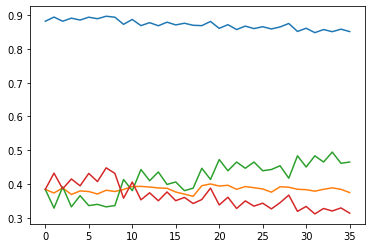

In [ ]:
plt.plot(lst_acc)
plt.plot(lst_f1)
plt.plot(lst_recall)
plt.plot(lst_prec)
plt.show()

## **ADASYN**

In [ ]:
ada_list = []
for i in range(25,101,25):
  print(i)
  a = ADASYN(sampling_strategy=i/100)
  ada_list.append(a)

25
50
75
100


In [ ]:
X_ada=[]
y_ada=[]
for i in range(0,4):
  a,b = ada_list[i].fit_sample(Train_X_Tfidf, Train_Y)
  X_ada.append(a)
  y_ada.append(b)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


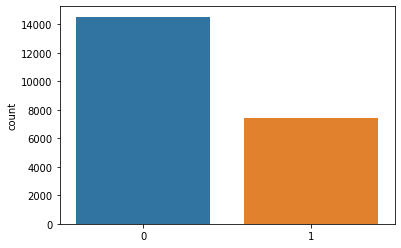

In [ ]:
sns.countplot(y_ada[1])

**Naive Bayes**

In [ ]:
for i in range(0,4):
  Naive = naive_bayes.MultinomialNB()
  Naive.fit(X_ada[i],y_ada[i])
  predictions_NB = Naive.predict(Valid_X_Tfidf)
  print("Naive Bayes Accuracy Score on valid set-> ",accuracy_score(predictions_NB, Valid_Y)*100)
  predictions_NB_T = Naive.predict(Test_X_Tfidf)
  print("Naive Bayes Accuracy Score on test set-> ",accuracy_score(predictions_NB_T, Test_Y)*100)
  predictions_NB_Tr = Naive.predict(X_ada[i])
  print("Naive Bayes Accuracy Score on training set -> ",accuracy_score(predictions_NB_Tr, y_ada[i])*100)
  predictions_NB_Tr = Naive.predict(Train_X_Tfidf)
  print("Naive Bayes Accuracy Score on training set -> ",accuracy_score(predictions_NB_Tr, Train_Y)*100)
  print ('\n*Classification Report: Naive bayes\n', classification_report(Test_Y, predictions_NB_T))
  print(confusion_matrix(Test_Y, predictions_NB_T))


Naive Bayes Accuracy Score on valid set->  91.85739436619718
Naive Bayes Accuracy Score on test set->  91.26452976400141
Naive Bayes Accuracy Score on training set ->  85.29186707477045
Naive Bayes Accuracy Score on training set ->  93.39076845679789

*Classification Report: Naive bayes
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      2568
           1       0.61      0.24      0.35       271

    accuracy                           0.91      2839
   macro avg       0.77      0.61      0.65      2839
weighted avg       0.89      0.91      0.90      2839

[[2525   43]
 [ 205   66]]
Naive Bayes Accuracy Score on valid set->  89.12852112676056
Naive Bayes Accuracy Score on test set->  89.85558295174357
Naive Bayes Accuracy Score on training set ->  87.93554606803471
Naive Bayes Accuracy Score on training set ->  92.32800905546472

*Classification Report: Naive bayes
               precision    recall  f1-score   support

           0 

**SVM**

In [ ]:
for i in range(0,4):
  SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
  SVM.fit(X_ada[i],y_ada[i])
  predictions_SVM = SVM.predict(Valid_X_Tfidf)
  print("SVM Accuracy Score on valid set-> ",accuracy_score(predictions_SVM, Valid_Y)*100)
  #accuracy on test set
  predictions_SVM_T = SVM.predict(Test_X_Tfidf)
  print("SVM Accuracy Score test set -> ",accuracy_score(predictions_SVM_T, Test_Y)*100)
  # Training set accuracy SVM
  predictions_SVM_Tr = SVM.predict(X_ada[i])
  print("SVM Accuracy Score on training set -> ",accuracy_score(predictions_SVM_Tr, y_ada[i])*100)
  print('\n*Classification Report: SVM\n', classification_report(Test_Y, predictions_SVM_T))
  print(confusion_matrix(Test_Y, predictions_SVM_T))

SVM Accuracy Score on valid set->  91.22652582159625
SVM Accuracy Score test set ->  90.87706939063051
SVM Accuracy Score on training set ->  93.21163095758635

*Classification Report: SVM
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2568
           1       0.52      0.55      0.54       271

    accuracy                           0.91      2839
   macro avg       0.74      0.75      0.74      2839
weighted avg       0.91      0.91      0.91      2839

[[2431  137]
 [ 122  149]]
SVM Accuracy Score on valid set->  89.01115023474179
SVM Accuracy Score test set ->  89.22155688622755
SVM Accuracy Score on training set ->  93.31129780103751

*Classification Report: SVM
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      2568
           1       0.45      0.65      0.53       271

    accuracy                           0.89      2839
   macro avg       0.71      0.78      0.74     

**Logistic Regression**

In [ ]:
for i in range(0,4):
    LR = LogisticRegression()
    model = LR.fit(X_ada[i],y_ada[i])
    prediction_LR = model.predict(Valid_X_Tfidf)
    print("Logistic Regression Accuracy Score on valid set-> ",accuracy_score(prediction_LR, Valid_Y)*100)
    #accuracy on test set
    predictions_LR_T = model.predict(Test_X_Tfidf)
    print("Logistic Regression Accuracy Score test set -> ",accuracy_score(predictions_LR_T, Test_Y)*100)
    # Training set accuracy SVM
    predictions_LR_Tr = model.predict(X_ada[i])
    print("Logistic Regression Accuracy Score on training set -> ",accuracy_score(predictions_LR_Tr, y_ada[i])*100)
    print('\n*Classification Report: Logistic Regression\n', classification_report(Test_Y, predictions_LR_T))
    print(confusion_matrix(Test_Y, predictions_LR_T))

Logistic Regression Accuracy Score on valid set->  91.57863849765259
Logistic Regression Accuracy Score test set ->  91.65199013737232
Logistic Regression Accuracy Score on training set ->  90.86139046786182

*Classification Report: Logistic Regression
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2568
           1       0.57      0.49      0.53       271

    accuracy                           0.92      2839
   macro avg       0.76      0.72      0.74      2839
weighted avg       0.91      0.92      0.91      2839

[[2470   98]
 [ 139  132]]
Logistic Regression Accuracy Score on valid set->  89.7593896713615
Logistic Regression Accuracy Score test set ->  90.24304332511448
Logistic Regression Accuracy Score on training set ->  90.66703392553826

*Classification Report: Logistic Regression
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      2568
           1       0.49      0

**KNN**

In [ ]:
lst_acc = [[]]
lst_f1 = [[]]
lst_recall = [[]]
lst_prec = [[]]
for i in range(0, 4):
  print("****************************************************************")
  for j in range(1,10):

    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(X_ada[i],y_ada[i])
    y_pred = knn.predict(Test_X_Tfidf)
    acc = metrics.accuracy_score(Test_Y, y_pred)
    recall = metrics.recall_score(Test_Y, y_pred)
    precision = metrics.precision_score(Test_Y, y_pred)
    f1 = metrics.f1_score(Test_Y, y_pred)
    # cr = classification_report(Test_Y, y_pred)
    print("Accuracy: {:.4f}" .format(acc), "F1 Score: {:.4f}" .format(f1), "Precision: {:.4f}" .format(precision), "Recall: {:.4f}" .format(recall))
    #print(cr)
    #print("Confusion Matrix :" confusion_matrix(Test_Y, predictions_SVM_T))
    # lst_acc[i].append(acc)
    # lst_f1[i].append(f1)
    # lst_prec[i].append(precision)
    # lst_recall[i].append(recall)
  print("****************************************************************")

****************************************************************
Accuracy: 0.8838 F1 Score: 0.3843 Precision: 0.3887 Recall: 0.3801
Accuracy: 0.8943 F1 Score: 0.3617 Precision: 0.4271 Recall: 0.3137
Accuracy: 0.8848 F1 Score: 0.3933 Precision: 0.3955 Recall: 0.3911
Accuracy: 0.8943 F1 Score: 0.3902 Precision: 0.4344 Recall: 0.3542
Accuracy: 0.8926 F1 Score: 0.4055 Precision: 0.4298 Recall: 0.3838
Accuracy: 0.8971 F1 Score: 0.3967 Precision: 0.4507 Recall: 0.3542
Accuracy: 0.8950 F1 Score: 0.3968 Precision: 0.4395 Recall: 0.3616
Accuracy: 0.8964 F1 Score: 0.3797 Precision: 0.4433 Recall: 0.3321
Accuracy: 0.8933 F1 Score: 0.3778 Precision: 0.4259 Recall: 0.3395
****************************************************************
****************************************************************
Accuracy: 0.8739 F1 Score: 0.3891 Precision: 0.3619 Recall: 0.4207
Accuracy: 0.8809 F1 Score: 0.3694 Precision: 0.3736 Recall: 0.3653
Accuracy: 0.8630 F1 Score: 0.3695 Precision: 0.3295 Recall: 0.4207
A